In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('car_price_prediction.csv')
df

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,02-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,04-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,04-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,04-May,Left wheel,Black,4,5331


In [3]:
df.isnull().sum()

ID                  0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Price               0
dtype: int64

In [4]:
df=df.drop(columns=['ID'])
df

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0,3607
4,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,02-Mar,Left wheel,Silver,5,8467
19233,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,04-May,Left wheel,Red,8,15681
19234,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,04-May,Left wheel,Grey,4,26108
19235,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,04-May,Left wheel,Black,4,5331


In [5]:
x=df.columns
x

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

1. **Price**: The amount of money required to purchase the car. This can vary based on factors like the car's condition, age, and features.



2. **Levy**: A tax or fee imposed on the car, which can include import duties, registration fees, or environmental taxes.



3. **Manufacturer**: The company or brand that produces the car, such as Toyota, Ford, or BMW.



4. **Model**: The specific version or design of the car produced by the manufacturer, such as a Toyota Corolla or Ford Mustang.



5. **Prod. year**: Short for "Production year," this indicates the year the car was manufactured.



6. **Category**: The classification of the car based on its type or use, such as sedan, SUV, truck, or convertible.



7. **Leather interior**: Whether the car's seats and other interior surfaces are upholstered with leather.



8. **Fuel type**: The kind of fuel the car uses, such as gasoline, diesel, electric, or hybrid.



9. **Engine volume**: The total volume of all the cylinders in the car's engine, usually measured in liters (e.g., 2.0L).



10. **Mileage**: The total distance the car has traveled, typically measured in miles or kilometers.



11. **Cylinders**: The number of cylinders in the car's engine, which affects its power and efficiency.



12. **Gear box type**: The type of transmission the car uses, such as manual, automatic, or semi-automatic.



13. **Drive wheels**: The wheels that receive power from the engine, such as front-wheel drive (FWD), rear-wheel drive (RWD), or all-wheel drive (AWD).



14. **Doors**: The number of doors on the car, including driver, passenger, and rear doors.



15. **Wheel**: The car's wheel specifications, which can include size and type.



16. **Color**: The color of the car's exterior paint.



17. **Airbags**: The number and location of airbags in the car, which are safety features designed to protect occupants in case of a collision.

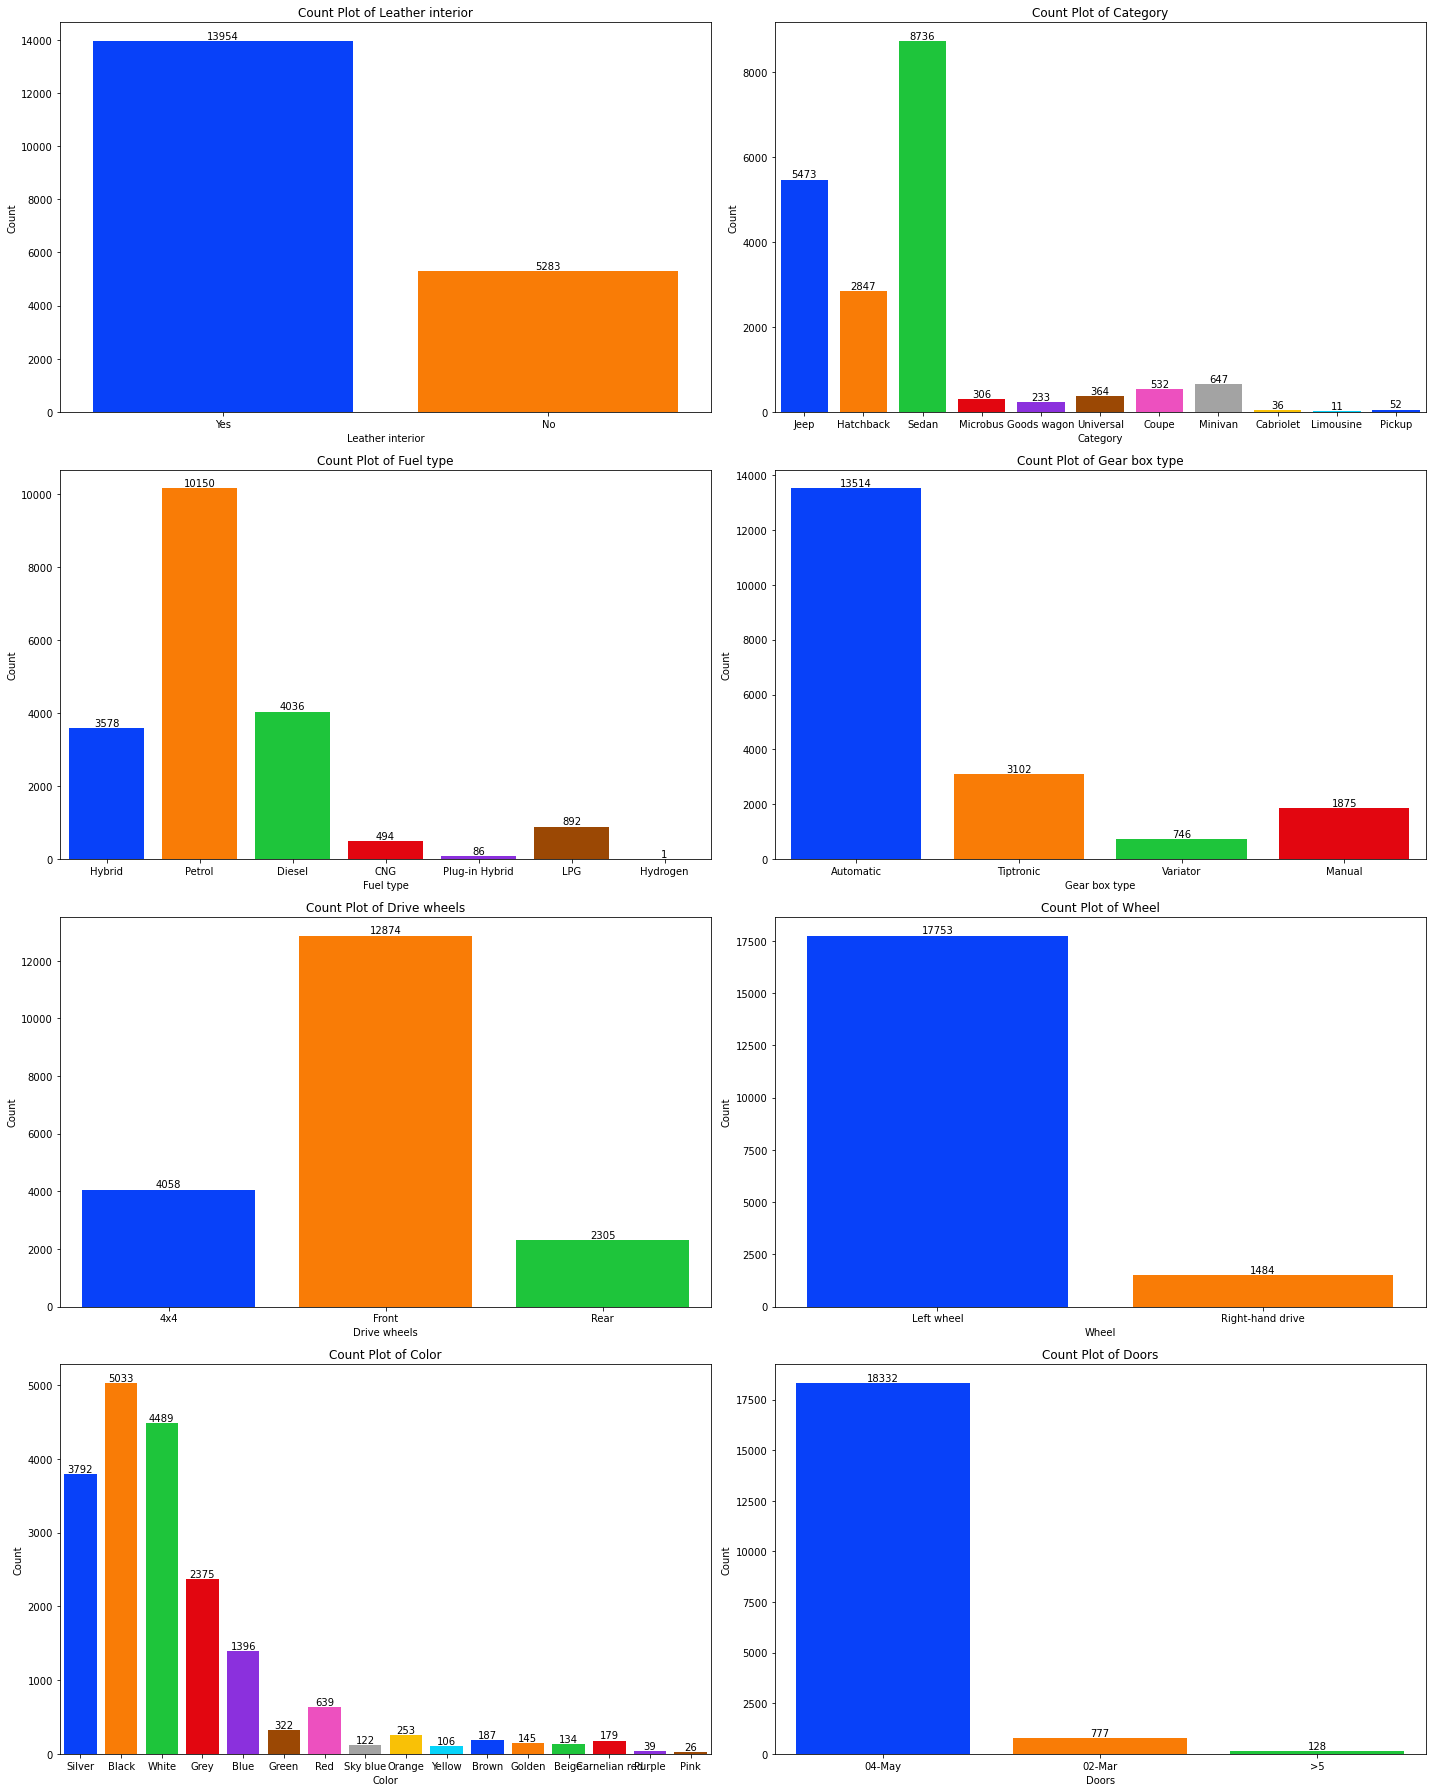

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of categorical columns to analyze
categorical_columns = ['Leather interior', 'Category', 'Fuel type', 'Gear box type',
                       'Drive wheels', 'Wheel', 'Color', 'Doors']

# Create subplots (4 rows x 3 columns to handle 10 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
        axes[i].set_title(f'Count Plot of {column.capitalize()}')
        axes[i].set_xlabel(column.capitalize())
        axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [7]:
df['Leather interior'].value_counts()

Yes    13954
No      5283
Name: Leather interior, dtype: int64

In [8]:
df['Leather interior']=df['Leather interior'].replace('Yes',1)
df['Leather interior']=df['Leather interior'].replace('No',0)


In [9]:
df.describe()

,Prod. year,Leather interior,Cylinders,Airbags,Price
count,19237.000000,19237.000000,19237.000000,19237.000000,1.923700e+04
mean,2010.912824,0.725373,4.582991,6.582627,1.855593e+04
std,5.668673,0.446338,1.199933,4.320168,1.905813e+05
min,1939.000000,0.000000,1.000000,0.000000,1.000000e+00
25%,2009.000000,0.000000,4.000000,4.000000,5.331000e+03
50%,2012.000000,1.000000,4.000000,6.000000,1.317200e+04
75%,2015.000000,1.000000,4.000000,12.000000,2.207500e+04
max,2020.000000,1.000000,16.000000,16.000000,2.630750e+07


In [10]:
l=df.columns

In [11]:
l=l.drop('Price')
l=l.drop('Prod. year')
l=l.drop('Leather interior')
l=l.drop('Cylinders')
l=l.drop('Airbags')

In [12]:
df['Manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [14]:
df['Manufacturer']=label_encoder.fit_transform(df['Manufacturer'])


In [15]:
l=l.drop('Manufacturer')

In [16]:
l

Index(['Levy', 'Model', 'Category', 'Fuel type', 'Engine volume', 'Mileage',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [17]:
df['Model'].value_counts()

Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64

In [18]:
df['Model']=label_encoder.fit_transform(df['Model'])


In [19]:
l=l.drop('Model')
l

Index(['Levy', 'Category', 'Fuel type', 'Engine volume', 'Mileage',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [20]:
df['Category'].value_counts()

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

In [21]:
df['Category']=label_encoder.fit_transform(df['Category'])


In [22]:
l=l.drop('Category')
l

Index(['Levy', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [23]:
df['Fuel type'].value_counts()


Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64

In [24]:
df['Fuel type']=label_encoder.fit_transform(df['Fuel type'])

In [25]:
l=l.drop('Fuel type')
l

Index(['Levy', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels',
       'Doors', 'Wheel', 'Color'],
      dtype='object')

In [26]:
df['Engine volume'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [27]:
l=l.drop('Engine volume')
l

Index(['Levy', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel',
       'Color'],
      dtype='object')

In [28]:
df['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

In [29]:
df['Mileage'][0]

'186005 km'

In [30]:
def extract_number(value):
    return int(''.join(filter(str.isdigit, value)))

In [31]:
df['Mileage'] = df['Mileage'].apply(extract_number)

In [32]:
df['Mileage'].value_counts()

0         721
200000    183
150000    161
160000    120
100000    119
         ... 
63083       1
28750       1
25077       1
77452       1
186923      1
Name: Mileage, Length: 7687, dtype: int64

In [33]:
l=l.drop('Mileage')
l

Index(['Levy', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'], dtype='object')

In [34]:
df['Gear box type'].value_counts()


Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear box type, dtype: int64

In [35]:
df['Gear box type']=label_encoder.fit_transform(df['Gear box type'])

In [36]:
l=l.drop('Gear box type')
l

Index(['Levy', 'Drive wheels', 'Doors', 'Wheel', 'Color'], dtype='object')

In [37]:
df['Drive wheels'].value_counts()


Front    12874
4x4       4058
Rear      2305
Name: Drive wheels, dtype: int64

In [38]:
df['Drive wheels']=label_encoder.fit_transform(df['Drive wheels'])

In [39]:
l=l.drop('Drive wheels')
l

Index(['Levy', 'Doors', 'Wheel', 'Color'], dtype='object')

In [40]:
df['Wheel'].value_counts()


Left wheel          17753
Right-hand drive     1484
Name: Wheel, dtype: int64

In [41]:
df['Wheel']=label_encoder.fit_transform(df['Wheel'])

In [42]:
l=l.drop('Wheel')
l

Index(['Levy', 'Doors', 'Color'], dtype='object')

In [43]:
df['Color'].value_counts()

Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64

In [44]:
df['Color']=label_encoder.fit_transform(df['Color'])


In [45]:
l=l.drop('Color')
l

Index(['Levy', 'Doors'], dtype='object')

In [46]:
df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [47]:
df['Levy']=df['Levy'].replace('-',0)

In [48]:
l=l.drop('Levy')
l

Index(['Doors'], dtype='object')

In [49]:
df['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [50]:
df['Doors']=label_encoder.fit_transform(df['Doors'])


In [51]:
df

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399,32,1242,2010,4,1,2,3.5,186005,6,0,0,1,0,12,12,13328
1,1018,8,658,2011,4,0,5,3,192000,6,2,0,1,0,1,8,16621
2,0,21,684,2006,3,0,5,1.3,200000,4,3,1,1,1,1,2,8467
3,862,16,661,2011,4,1,2,2.5,168966,4,0,0,1,0,14,0,3607
4,446,21,684,2014,3,1,5,1.3,91901,4,0,1,1,0,12,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0,36,385,1999,1,1,0,2.0 Turbo,300000,4,1,2,0,0,12,5,8467
19233,831,23,1334,2011,9,1,5,2.4,161600,4,2,1,1,0,11,8,15681
19234,836,23,1442,2010,4,1,1,2,116365,4,0,1,1,0,7,4,26108
19235,1288,8,456,2007,4,1,1,2,51258,4,0,1,1,0,1,4,5331


In [52]:
df['Levy']=df['Levy'].astype(int)

In [53]:
df.describe()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
count,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,1.923700e+04
mean,632.528669,33.080678,862.592348,2010.912824,6.265582,0.725373,3.432396,1.532236e+06,4.582991,0.536310,0.908874,0.966263,0.077143,7.776005,6.582627,1.855593e+04
std,567.721688,17.766465,410.812287,5.668673,2.790570,0.446338,1.807388,4.840387e+07,1.199933,0.896607,0.567875,0.214264,0.266825,5.363884,4.320168,1.905813e+05
min,0.000000,0.000000,0.000000,1939.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,21.000000,537.000000,2009.000000,4.000000,0.000000,2.000000,7.013900e+04,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000,5.331000e+03
50%,642.000000,32.000000,834.000000,2012.000000,7.000000,1.000000,5.000000,1.260000e+05,4.000000,0.000000,1.000000,1.000000,0.000000,7.000000,6.000000,1.317200e+04
75%,917.000000,54.000000,1226.000000,2015.000000,9.000000,1.000000,5.000000,1.888880e+05,4.000000,1.000000,1.000000,1.000000,0.000000,12.000000,12.000000,2.207500e+04
max,11714.000000,64.000000,1589.000000,2020.000000,10.000000,1.000000,6.000000,2.147484e+09,16.000000,3.000000,2.000000,2.000000,1.000000,15.000000,16.000000,2.630750e+07


In [54]:
df['Engine volume'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [55]:
type(df['Engine volume'][0])

str

In [56]:
import re
def extract_number(value):
    match = re.search(r'\d+\.\d+|\d+', value)
    return float(match.group()) if match else None


In [57]:
df['Engine volume'] = df['Engine volume'].apply(extract_number)


In [58]:
df['Engine volume'].value_counts()

2.0    4324
2.5    2370
1.8    1937
1.6    1578
1.5    1393
       ... 
3.1       1
7.3       1
0.5       1
6.8       1
5.8       1
Name: Engine volume, Length: 65, dtype: int64

In [59]:
df.describe()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
count,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,1.923700e+04
mean,632.528669,33.080678,862.592348,2010.912824,6.265582,0.725373,3.432396,2.307990,1.532236e+06,4.582991,0.536310,0.908874,0.966263,0.077143,7.776005,6.582627,1.855593e+04
std,567.721688,17.766465,410.812287,5.668673,2.790570,0.446338,1.807388,0.877805,4.840387e+07,1.199933,0.896607,0.567875,0.214264,0.266825,5.363884,4.320168,1.905813e+05
min,0.000000,0.000000,0.000000,1939.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,21.000000,537.000000,2009.000000,4.000000,0.000000,2.000000,1.800000,7.013900e+04,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000,5.331000e+03
50%,642.000000,32.000000,834.000000,2012.000000,7.000000,1.000000,5.000000,2.000000,1.260000e+05,4.000000,0.000000,1.000000,1.000000,0.000000,7.000000,6.000000,1.317200e+04
75%,917.000000,54.000000,1226.000000,2015.000000,9.000000,1.000000,5.000000,2.500000,1.888880e+05,4.000000,1.000000,1.000000,1.000000,0.000000,12.000000,12.000000,2.207500e+04
max,11714.000000,64.000000,1589.000000,2020.000000,10.000000,1.000000,6.000000,20.000000,2.147484e+09,16.000000,3.000000,2.000000,2.000000,1.000000,15.000000,16.000000,2.630750e+07


In [60]:
a=df
a=a.drop(columns=['Price'])
a

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,1399,32,1242,2010,4,1,2,3.5,186005,6,0,0,1,0,12,12
1,1018,8,658,2011,4,0,5,3.0,192000,6,2,0,1,0,1,8
2,0,21,684,2006,3,0,5,1.3,200000,4,3,1,1,1,1,2
3,862,16,661,2011,4,1,2,2.5,168966,4,0,0,1,0,14,0
4,446,21,684,2014,3,1,5,1.3,91901,4,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0,36,385,1999,1,1,0,2.0,300000,4,1,2,0,0,12,5
19233,831,23,1334,2011,9,1,5,2.4,161600,4,2,1,1,0,11,8
19234,836,23,1442,2010,4,1,1,2.0,116365,4,0,1,1,0,7,4
19235,1288,8,456,2007,4,1,1,2.0,51258,4,0,1,1,0,1,4


In [61]:
X=a
y=df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# data anlaysis

In [62]:
numerical_features =['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags']

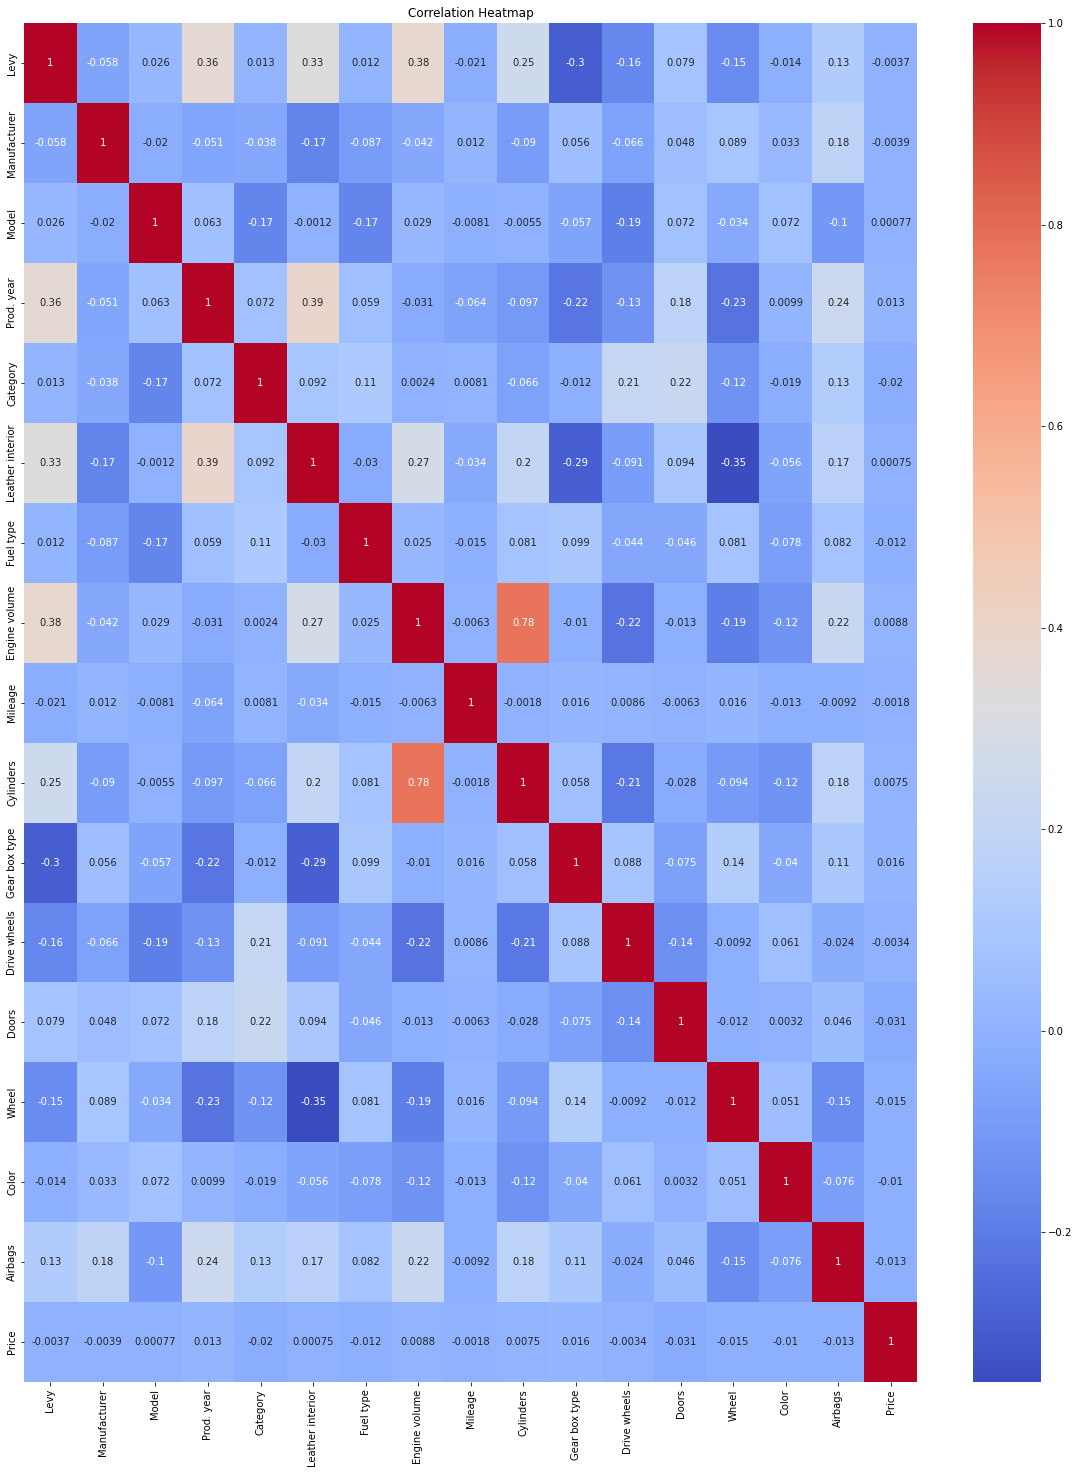

In [73]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(20, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 1. Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print('Linear Regression R^2 Score:', r2)
print('Linear Regression MAE:', mean_absolute_error(y_test, y_pred))
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred))


Linear Regression R^2 Score: -0.09192513852381756
Linear Regression MAE: 12597.45276783546
Linear Regression MSE: 340240176.65038025


# 2. Decision Trees

In [65]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print('Decision Tree R^2 Score:', r2)
print('Decision Tree MAE:', mean_absolute_error(y_test, y_pred))
print('Decision Tree MSE:', mean_squared_error(y_test, y_pred))


Decision Tree R^2 Score: -577.0097258377615
Decision Tree MAE: 12356.889315949098
Decision Tree MSE: 180105873824.41525


# 3. Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print('Random Forest R^2 Score:', r2)
print('Random Forest MAE:', mean_absolute_error(y_test, y_pred))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred))


Random Forest R^2 Score: -62.29157256096884
Random Forest MAE: 9191.159853570578
Random Forest MSE: 19721439747.908764


# 4. Gradient Boosting Machines (GBM)

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting
gbm_reg = GradientBoostingRegressor(n_estimators=100, random_state=0)
gbm_reg.fit(X_train, y_train)
y_pred = gbm_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print('Gradient Boosting R^2 Score:', r2)
print('Gradient Boosting MAE:', mean_absolute_error(y_test, y_pred))
print('Gradient Boosting MSE:', mean_squared_error(y_test, y_pred))


Gradient Boosting R^2 Score: -1.408867757037188
Gradient Boosting MAE: 10716.9613458544
Gradient Boosting MSE: 750595038.309818


# 5. XGBoost

In [68]:
import xgboost as xgb

# XGBoost
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=0)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print('XGBoost R^2 Score:', r2)
print('XGBoost MAE:', mean_absolute_error(y_test, y_pred))
print('XGBoost MSE:', mean_squared_error(y_test, y_pred))


XGBoost R^2 Score: 0.6774857540076834
XGBoost MAE: 5138.17389989494
XGBoost MSE: 100494347.23797823


# 6. Support Vector Regression (SVR)

In [69]:
from sklearn.svm import SVR

# Support Vector Regression
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)
y_pred = svr_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print('Support Vector Regression R^2 Score:', r2)
print('Support Vector Regression MAE:', mean_absolute_error(y_test, y_pred))
print('Support Vector Regression MSE:', mean_squared_error(y_test, y_pred))


Support Vector Regression R^2 Score: -0.04676413056669748
Support Vector Regression MAE: 11427.581113698297
Support Vector Regression MSE: 326168159.4553072


# 7. Neural Networks (MLPRegressor)

In [70]:
from sklearn.neural_network import MLPRegressor

# Neural Network
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0)
mlp_reg.fit(X_train, y_train)
y_pred = mlp_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print('Neural Network R^2 Score:', r2)
print('Neural Network MAE:', mean_absolute_error(y_test, y_pred))
print('Neural Network MSE:', mean_squared_error(y_test, y_pred))


Neural Network R^2 Score: -1.0864871109928922
Neural Network MAE: 12092.43542306468
Neural Network MSE: 650142320.3633647


# 8. k-Nearest Neighbors (k-NN)

In [71]:
from sklearn.neighbors import KNeighborsRegressor

# k-Nearest Neighbors
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print('k-Nearest Neighbors R^2 Score:', r2)
print('k-Nearest Neighbors MAE:', mean_absolute_error(y_test, y_pred))
print('k-Nearest Neighbors MSE:', mean_squared_error(y_test, y_pred))


k-Nearest Neighbors R^2 Score: -46.26588507598973
k-Nearest Neighbors MAE: 12859.361226611227
k-Nearest Neighbors MSE: 14727889779.634867


# 9. Lasso and Ridge Regression

In [72]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print('Lasso Regression R^2 Score:', r2)
print('Lasso Regression MAE:', mean_absolute_error(y_test, y_pred))
print('Lasso Regression MSE:', mean_squared_error(y_test, y_pred))

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print('Ridge RegressionR^2 Score:', r2)
print('Ridge Regression MAE:', mean_absolute_error(y_test, y_pred))
print('Ridge Regression MSE:', mean_squared_error(y_test, y_pred))


Lasso Regression R^2 Score: -0.09189171032178733
Lasso Regression MAE: 12597.256747771527
Lasso Regression MSE: 340229760.53579277
Ridge RegressionR^2 Score: -0.09140431105549629
Ridge Regression MAE: 12595.349106128924
Ridge Regression MSE: 340077888.5744179


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.39884e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Interpreting the Results

**Mean Absolute Error (MAE)**: Lower values indicate better performance.

**Mean Squared Error (MSE)**: Lower values indicate better performance.

**𝑅^2Score**: Higher values (closer to 1) indicate better performance.
